In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df= pd.read_csv(r"C:\Users\DELL\Desktop\N-Tech\Python\python datasets\titanic.csv")

In [126]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### 1.How many people Survived and how many people died

In [97]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [98]:
df['Survived'].value_counts().sort_index()

Survived
0    549
1    342
Name: count, dtype: int64

### Number of Survived=342
### Number of Dead=549

<Axes: xlabel='Survived'>

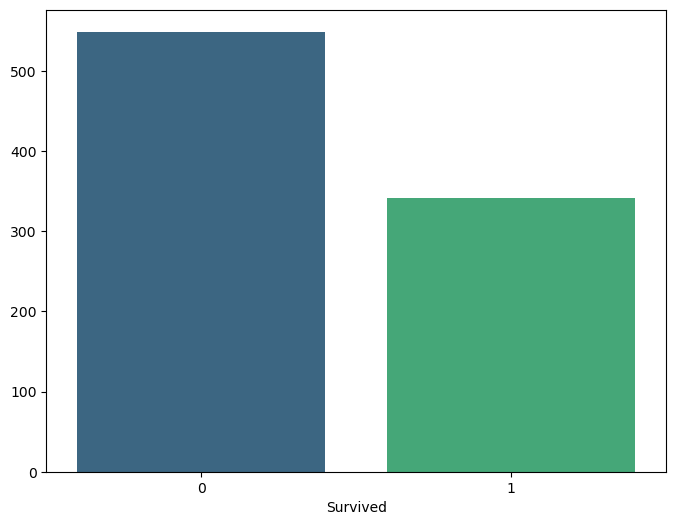

In [99]:
survived_counts = df['Survived'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette='viridis')

#### 2. How many Passengers were in First class ,Second Class and Third Class?

In [88]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [89]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### Number of passangers in First Class= 216
#### Number of passangers in Second Class= 184
#### Number of passangers in Third Class= 491


In [90]:
data = {'Pclass': [3, 1, 3, 1, 2, 3, 3, 1, 3, 2, 1, 3, 3, 2, 1]}
df = pd.DataFrame(data)
df['Pclass'] = df['Pclass'].replace({1: 'First Class', 2: 'Second Class', 3: 'Third Class'})
pclass_counts = df['Pclass'].value_counts().sort_index()

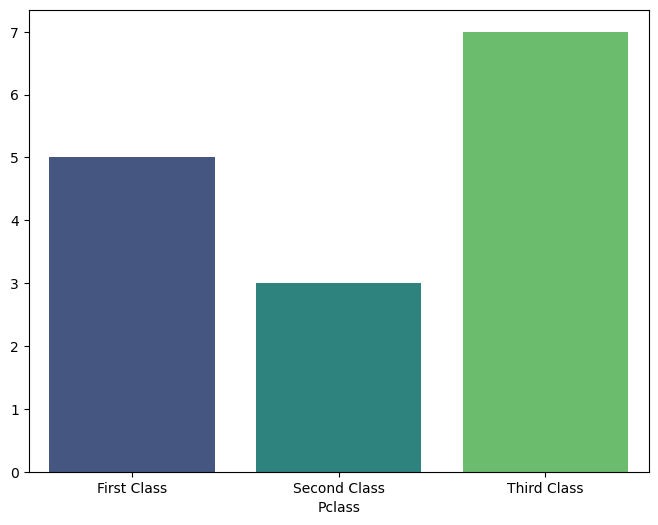

In [91]:
pclass_counts = df['Pclass'].value_counts().sort_index()
data = {'Pclass': [3, 1, 3, 1, 2, 3, 3, 1, 3, 2, 1, 3, 3, 2, 1]}
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette='viridis')
plt.show()

#### 3. Find the Number of Male and Female Passengers

In [100]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [101]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

#### Male=577
#### Female=314

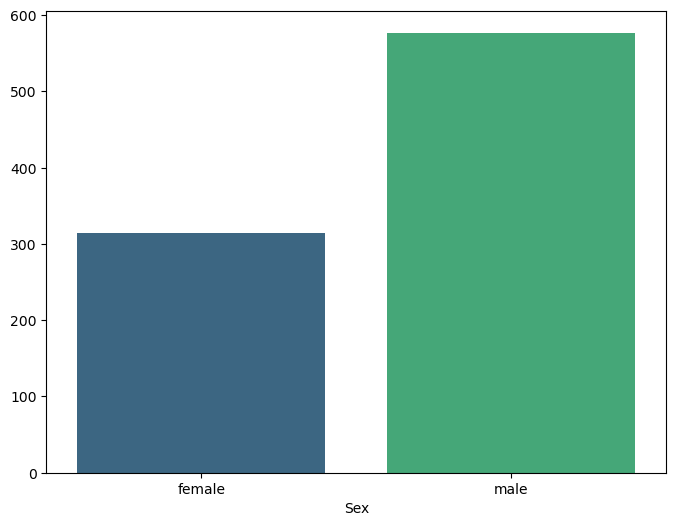

In [ ]:
Sex_counts = df['Sex'].value_counts().sort_index()
data = {'Sex': [3, 1, 3, 1, 2, 3, 3, 1, 3, 2, 1, 3, 3, 2, 1]}
df = pd.DataFrame(data)
plt.figure(figsize=(8, 6))
sns.barplot(x=Sex_counts.index, y=Sex_counts.values, palette='viridis')
plt.show()

### 4. Who has better chance of Survival

In [128]:
grouped_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

In [129]:
num_survived_female = grouped_counts.loc['female', 1]
num_dead_female = grouped_counts.loc['female', 0]
num_survived_male = grouped_counts.loc['male', 1]
num_dead_male = grouped_counts.loc['male', 0]

In [130]:
print(f"Number of survived females: {num_survived_female}")
print(f"Number of deceased females: {num_dead_female}")
print(f"Number of survived males: {num_survived_male}")
print(f"Number of deceased males: {num_dead_male}")

Number of survived females: 233
Number of deceased females: 81
Number of survived males: 109
Number of deceased males: 468


<Axes: xlabel='Category', ylabel='Count'>

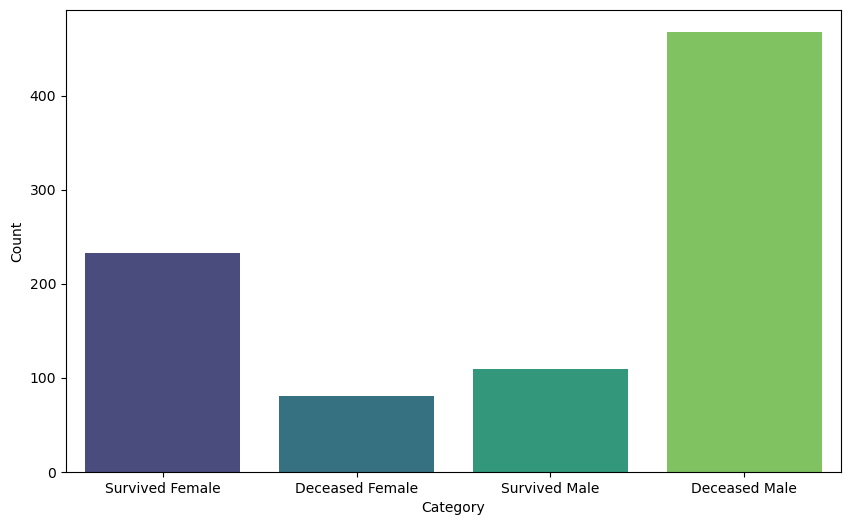

In [131]:
visualization_df = pd.DataFrame({
    'Count': [num_survived_female, num_dead_female, num_survived_male, num_dead_male],
    'Category': ['Survived Female', 'Deceased Female', 'Survived Male', 'Deceased Male']
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=visualization_df, palette='viridis')

#### The Female Gender has the better survival chance

#### 5. Which passenger class has better chance of Survival?

In [139]:
grouped_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
df['Pclass'] = df['Pclass'].replace({1: 'First Class', 2: 'Second Class', 3: 'Third Class'})
grouped_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
grouped_counts


Survived,0,1
Pclass,,
First Class,80,136
Second Class,97,87
Third Class,372,119


<Axes: xlabel='Pclass', ylabel='Count'>

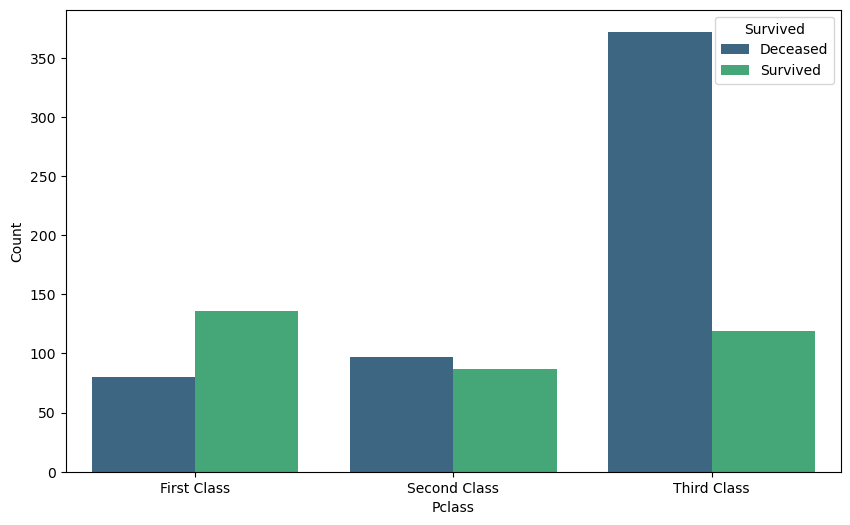

In [142]:
grouped_counts = grouped_counts.reset_index()
melted_counts = grouped_counts.melt(id_vars='Pclass', value_vars=[0, 1], var_name='Survived', value_name='Count')
melted_counts['Survived'] = melted_counts['Survived'].replace({0: 'Deceased', 1: 'Survived'})
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Count', hue='Survived', data=melted_counts, palette='viridis')

#### Passengers in Fisrt Class has the better survival chance

#### Testing Testing